In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Sampling Estimates of Variance

The Monte Carlo method can be used to estimate the variance of a quantity of interest, e.g.,

$$
V = \mathbb{V}[g(X)],
$$

where $g(x)$ and $X$ are as defined in the previous page.
The idea is to express the variance using expectations.
Recall that:

$$
V = \mathbb{V}[g(X)] = \mathbb{E}[g^2(X)] - \left(\mathbb{E}[g(X)]\right)^2.
$$

We already know how to estimate the last term; see the definition of $\bar{I}_N$ in the previous subsection.
Consider the random variables $g^2(X_1),g^2(X_2),\dots$ to approximate the other term.
These are independent and identically distributed, so by the law of large numbers, we get that:

$$
\frac{g^2(X_1)+\dots+g^2(X_N)}{N}\rightarrow \mathbb{E}[g^2(X)]\;\text{a.s.}
$$

Putting everything together, we get that:

$$
\bar{V}_N = \frac{1}{N}\sum_{i=1}^Ng^2(X_i) - \bar{I}_N^2\rightarrow V\;\text{a.s.}
$$

```{note}
We have constructed a biased estimator of the variance.
This means that the expected value of the estimator is not equal to the true variance.
The formula for the unbiased estimator is:

$$
\bar{V}_N = \frac{1}{N-1}\sum_{i=1}^N\left[g(X_i) - \bar{I}_N\right]^2.
$$

However, the biased estimator is more commonly used in practice.
And it is essentially the same as the unbiased estimator when $N$ is large.
If you want to learn more about unbiased estimators, see [this Wikipedia article](https://en.wikipedia.org/wiki/Bias_of_an_estimator).
You learn about things like this in a course on mathematical statistics.
```

## Example: 1D variance

Let's try it out with the same example as before (Example 3.4 of Robert & Casella (2004)).
Assume that $X\sim\mathcal{U}([0,1])$ and pick:

$$
g(x) = \left(\cos(50x) + \sin(20x)\right)^2.
$$

The correct value for the variance is:

$$
\mathbb{V}[g(X)] \approx 1.093.
$$

Let's find a sampling average estimate of the variance:

In [2]:
import numpy as np

# Define the function
g = lambda x: (np.cos(50 * x) + np.sin(20 * x)) ** 2

# Number of samples to take
N = 100
# Generate samples from X
x_samples = np.random.rand(N)
# Get the corresponding Y's
y_samples = g(x_samples)
# Evaluate the sample average E[g(X)] for all sample sizes
I_running = np.cumsum(y_samples) / np.arange(1, N + 1)
# Evaluate the sample average for E[g^2(X)] for all sample sizes
I2_running = np.cumsum(y_samples ** 2) / np.arange(1, N + 1)
# Build the sample average for V[g(X)]
V_running = I2_running - I_running ** 2

Plot a running estimate of the variance:

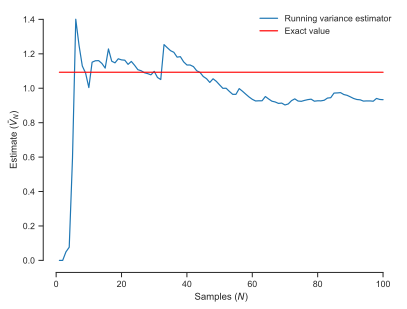

In [3]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, N+1), V_running, label="Running variance estimator")
ax.plot(np.arange(1, N+1), [1.093] * N, color='r', label="Exact value")
ax.set_xlabel(r"Samples ($N$)")
ax.set_ylabel(r"Estimate ($\bar{V}_N$)")
plt.legend(loc="best", frameon=False)
sns.despine(trim=True);


## Questions

+ Increase ``N`` until you get an answer close enough to the correct answer (the red line).
+ Reduce ``N`` back to a small number, say 1,000. Run the code 2-3 times to observe that you get a slightly different answer every time.